<h1>Introduction to Data Science (LTAT.02.002) </h1><br>
<h2>Project: Mobile Price Classification</h2> <br>
<h3>Team: Markkus Koddala, </h3> <br>
Description:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 30) 
pd.set_option('display.max_rows', 50)

In [2]:
 #read data in
df_train = pd.read_csv("train.csv", sep=",")
df_test = pd.read_csv("test.csv", sep=",")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


<h1> Step 1. Data understanding </h>

In [3]:
df_train.shape

(2000, 21)

In [4]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<h1> Step 2. Data preparation

In [7]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

In [10]:
duplicateRows = df_train[df_train.duplicated()]
print(duplicateRows)


Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []


In [11]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
#blue, dual_sim, four_g, n_cores, three_g, touch_screen, wifi, price_range are categorical values

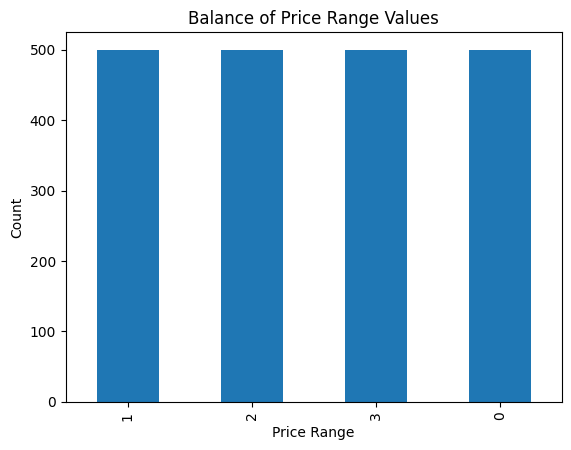

In [13]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'price_range' is the column
df_train['price_range'].value_counts().plot(kind='bar')
plt.title('Balance of Price Range Values')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


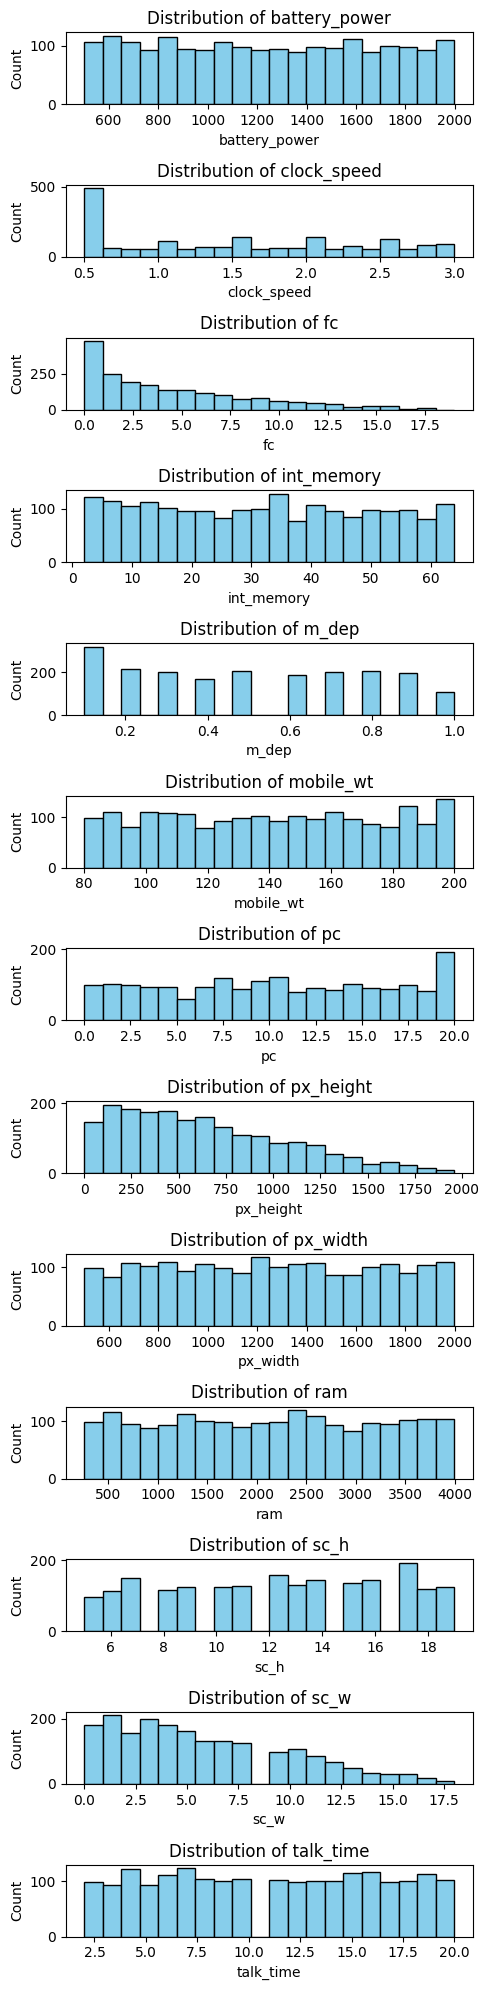

In [14]:
import matplotlib.pyplot as plt
# Assuming df is your DataFrame and 'var1', 'var2', ..., 'var7' are the columns
variables = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

fig, axs = plt.subplots(len(variables), figsize=(5, 20))

for i, var in enumerate(variables):
    axs[i].hist(df_train[var], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribution of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


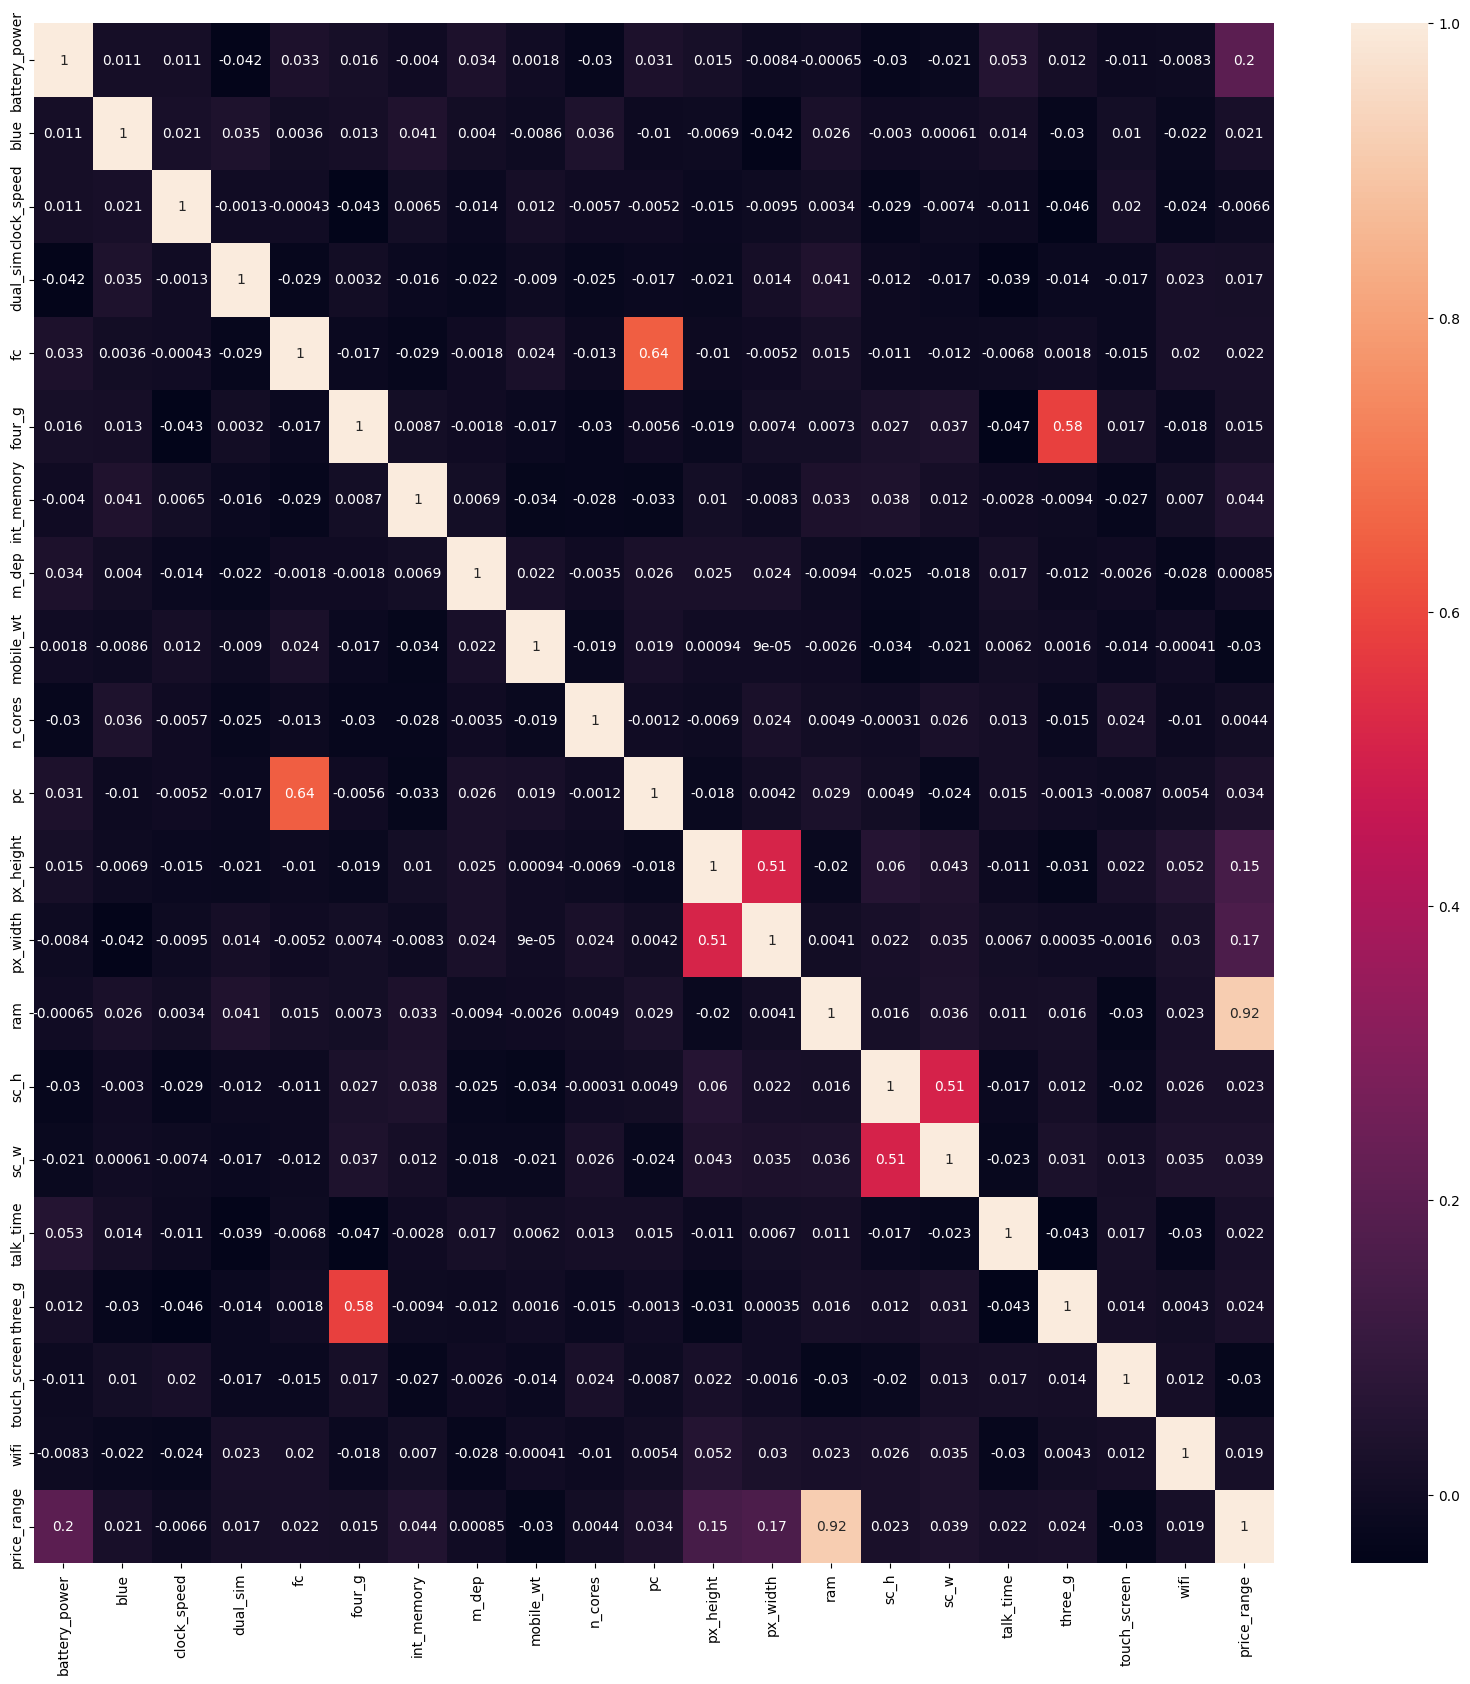

In [15]:
corr = df_train.corr()


# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
##ekraani laiuse ja kõrguse asemel arvutada diagonaal

#kas four g telodel kõikidel on 3g?

#EDA ANALÜÜS

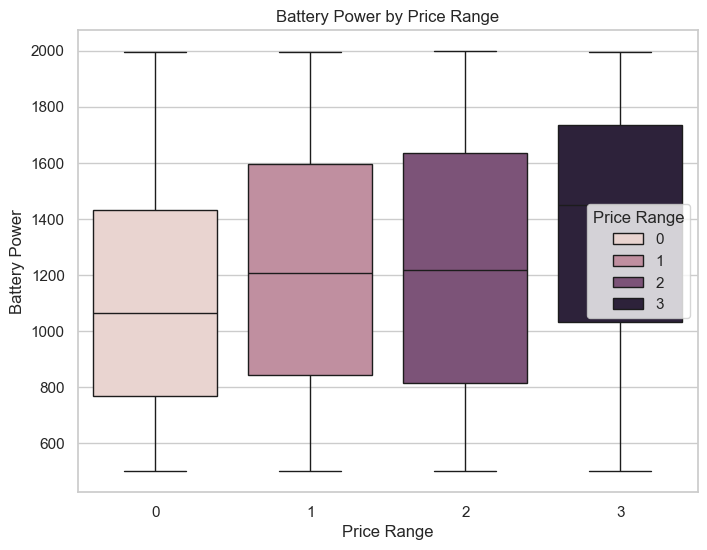

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style (optional)
sns.set(style="whitegrid")

# Create the box plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='price_range', y='battery_power', data=df_train, hue='price_range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power by Price Range')
plt.legend(title='Price Range')
plt.show()



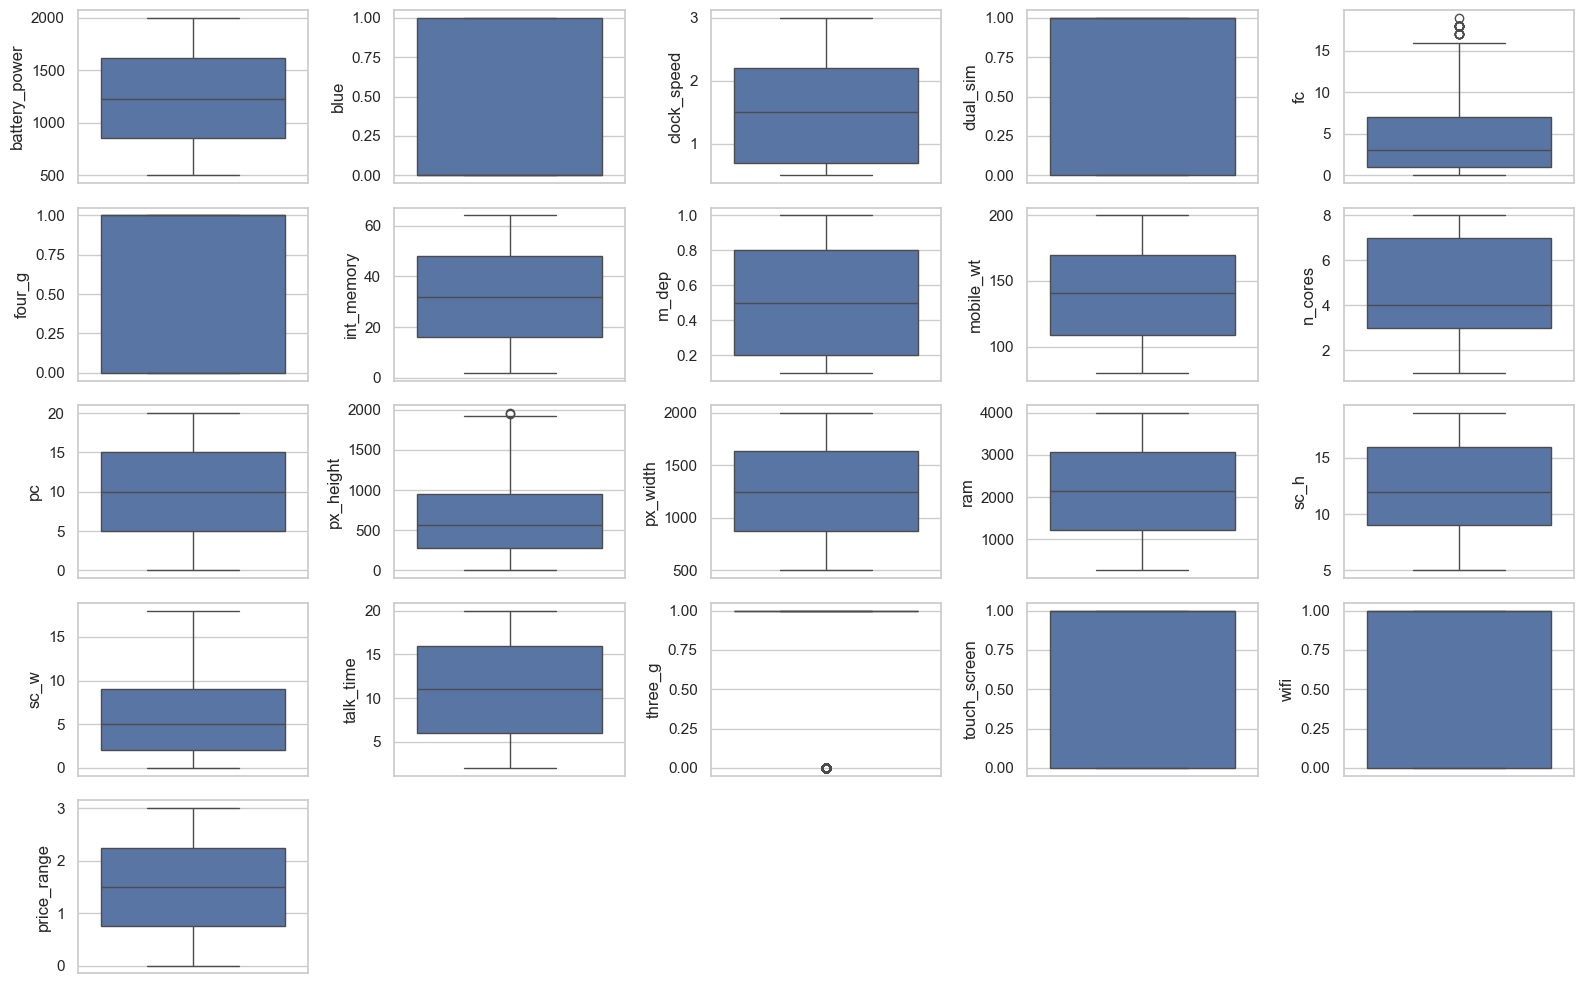

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for visualization
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Set style (optional)
sns.set(style="whitegrid")

# Create box plots for each numerical column
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
for i, column in enumerate(numerical_columns):
    plt.subplot(5, 5, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=column, data=df_train)
    plt.ylabel(column)
    plt.tight_layout()

plt.show()


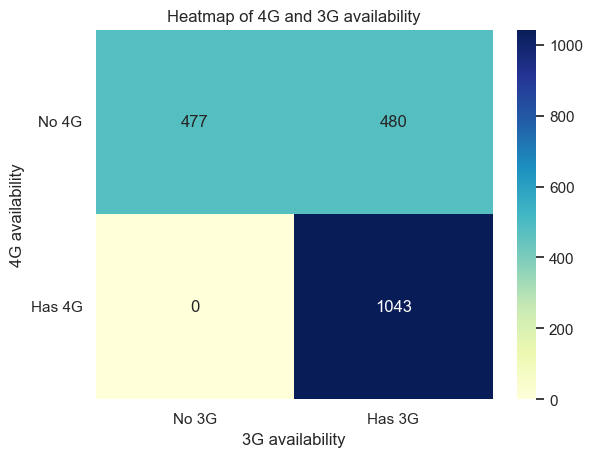

In [19]:
import seaborn as sns

contingency_table = pd.crosstab(df_train['four_g'], df_train['three_g'])

sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of 4G and 3G availability')
plt.xlabel('3G availability')
plt.ylabel('4G availability')
plt.xticks([0.5,1.5], ['No 3G', 'Has 3G'])
plt.yticks([0.5,1.5], ['No 4G', 'Has 4G'], rotation=0)
plt.show()


In [20]:
#c

def network_type(row):
    if row['four_g'] == 1:
        return 2
    elif row['three_g'] == 1:
        return 1
    else:
        return 0

df_train['network_type'] = df_train.apply(network_type, axis=1)


In [21]:
# convert screen width and height to diagonal

import math

def height_width_to_diagonal(height, width):
  return math.sqrt(height**2 + width**2)

diagonals = []

for index, row in df_train.iterrows():
  diagonal = round(height_width_to_diagonal(row["sc_h"], row["sc_w"]),1)
  diagonals.append(diagonal)

df_train['diagonals'] = diagonals


In [22]:
# Assuming df is your DataFrame
df_train['pixel_area'] = df_train['px_height'] * df_train['px_width']


In [23]:
df_train_Y = df_train["price_range"]   # All rows, only the last column
df_train_X = df_train.drop('price_range', axis=1)


In [24]:
df_train_X = df_train_X.drop(['sc_h', 'sc_w', 'four_g','three_g', 'px_width', 'px_height'], axis = 1)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Instantiate the StandardScaler
scaler = StandardScaler()

# Assuming df_train_X is a DataFrame containing features to be standardized
# Fit the scaler to the training data and transform it
df_train_X_scaled = scaler.fit_transform(df_train_X)

# Convert the standardized array back to a DataFrame
df_train_X_scaled = pd.DataFrame(df_train_X_scaled, columns=df_train_X.columns)


In [26]:
df_train_X_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,network_type,diagonals,pixel_area
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,-1.811884e-16,1.421085e-16,-5.417888e-17,1.421085e-17,9.237056e-17,2.575717e-16,-3.064216e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.722711e+00,-1.649584e+00,-1.006018e+00,-1.014099e+00,-1.555968e+00,-1.752186e+00,-1.091260e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.453168e-01,-9.173306e-01,-1.006018e+00,-1.014099e+00,-3.432104e-01,-8.728737e-01,-7.739807e-01
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,2.055123e-02,-2.013697e-03,9.940179e-01,9.860966e-01,8.695471e-01,4.551906e-02,-3.663422e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,8.670548e-01,9.133032e-01,9.940179e-01,9.860966e-01,8.695471e-01,7.685091e-01,5.470007e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,1.727851e+00,1.645557e+00,9.940179e-01,9.860966e-01,8.695471e-01,2.390352e+00,3.593548e+00


<h1> Model Training</h1>

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_Y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print(X_train.columns)

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'network_type', 'diagonals', 'pixel_area'],
      dtype='object')
Accuracy: 0.8775


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.275